# Team 13: Wild Life Classification with Deep Learning Methods

The effectiveness of wildlife preservation relies heavily on in-depth understanding of the diversity and behavior of animals, which requires intensive manual labor of experts to correctly label the images collected. In this project, we will try to automate this process by constructing a deep learning model for wildlife classification.  

## Environment Setup 

In [1]:
# Import Packages 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as T
import torchvision.models as models
import numpy as np
import torch.nn.functional as F  
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision import datasets, transforms, models 
from torch.utils.data import random_split
import torchvision
import matplotlib.pyplot as plt
import gc

## Load Dataset 

In [2]:
USE_GPU = True
dtype = torch.float32 

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('using device:', device)

batch_size = 64
dataroot = "C:/Users/HinanawiTS/Documents/GitHub/ECE 285 Project/processed/processed" # Replace it to be your data directory! 
dataset = ImageFolder(root = dataroot, transform = transforms.Compose([transforms.ToTensor()]))
train_ratio = 0.5
trainlen = int(len(dataset) * train_ratio)
vallen = len(dataset) - trainlen
train, val = random_split(dataset, [trainlen, vallen])
loader_train = DataLoader(train, batch_size = batch_size, num_workers = 0, pin_memory = True)
loader_val = DataLoader(val, batch_size = batch_size, num_workers = 0, pin_memory = True)

using device: cuda


# Implement Training and Validation Pipeline 

In [3]:
# Data Transformation 
dataset = ImageFolder(root = dataroot,
                           transform = transforms.Compose([
                               transforms.Resize(224),
                               transforms.CenterCrop(224),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
dataloader = DataLoader(dataset, batch_size = batch_size, num_workers = 0)
train_ratio = 0.7
val_ratio = 0.2 

trainlen = int(len(dataset) * train_ratio)
vallen = int(len(dataset) * val_ratio)
telen = len(dataset) - trainlen - vallen

loader_train, loader_val, loader_t = random_split(dataset, [trainlen, vallen, telen])

loader_train = DataLoader(loader_train, batch_size = batch_size, num_workers = 0)
loader_val = DataLoader(loader_val, batch_size = batch_size, num_workers = 0)
loader_t = DataLoader(loader_t, batch_size = batch_size, num_workers = 0)

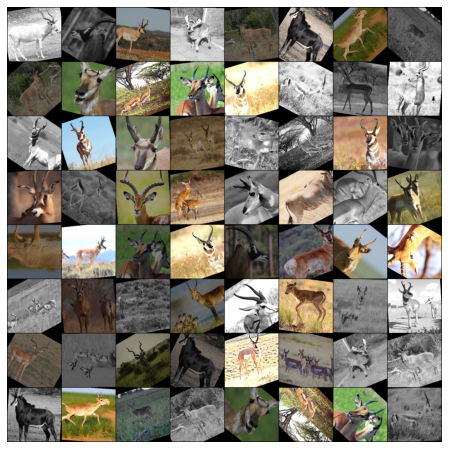

In [32]:
# Visualize Dataset 
real_batch = next(iter(dataloader))
plt.figure(figsize = (8, 8))

plt.axis("off")

plt.imshow(np.transpose(torchvision.utils.make_grid(real_batch[0].to(device), padding = 2, normalize = True).cpu(),(1,2,0)))

In [5]:
# Training Pipeline 
def train_model(model, optimizer, epochs):
    """
    Train a model using the PyTorch Module API. 
    
    :param model: model to train 
    :type model: Pytorch Module 
    
    :param optimizer: optimizer for training 
    :type optimizer: Pytorch Optimizer 
    
    :param epochs: number of epochs 
    :type epochs: integer 
    
    :returns: training error, validation accuracy 
    :type returns: list, list 
    
    """
    assert True 
    
    model = model.to(device=device)  
    tr = []
    va = []
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            model.train()  
            x = x.to(device = device, dtype = dtype)  
            y = y.to(device = device, dtype = torch.long)
            scores = model(x)
            loss = F.cross_entropy(scores, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if t % 200 == 0:
                print("Epoch: " + str(e) + ", Training Error: " + str(loss.item()))
                cs = validation_accuracy(loader_val, model)
                print()
            tr.append(loss.item())
            va.append(cs)
    return tr, va


In [7]:
# Validation Pipeline 
def validation_accuracy(loader, model):
    """ 
    Validation accuracy. 
    
    :param loader: data loader 
    :type loader: Pytorch loader 
    
    :param model: model 
    :type model: Pytorch model 
    
    :returns: validation accuracy 
    :type returns: list 
    
    """  
    assert True 
    
    num_correct = 0
    num_samples = 0
    model.eval()  
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device = device, dtype = dtype)  
            y = y.to(device = device, dtype = torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print("Validation Accuracy: " + str(100 * acc) + "%")
        
    return acc


# Basline Selection 

In this section we train several deep learning models and choose the best one to be our baseline model. The models include: VGG 16, Resnet 50, Wide ResNet50, and DenseNet 121. MLP is not included here because it was proven not powerful enough in our prior experiments. All models are trained for 10 epochs, using Cross-Entropy loss, Adam Optimizer, with batch size = 16, learning rate = 0.0001. 

In [8]:
vgmodel = models.vgg16(pretrained = True)
optimizer = optim.Adam(vgmodel.parameters(), lr = 0.0001)
tr_vgg, va_vgg = train_model(vgmodel, optimizer, epochs = 10)

J:\Anaconda\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 0, Training Error: 13.403725624084473
Validation Accuracy: 0.41746949261400135%

Epoch: 1, Training Error: 4.409744739532471
Validation Accuracy: 7.418111753371869%

Epoch: 2, Training Error: 3.396946668624878
Validation Accuracy: 26.172125883108542%

Epoch: 3, Training Error: 1.8977465629577637
Validation Accuracy: 44.669235709698135%

Epoch: 4, Training Error: 1.018323302268982
Validation Accuracy: 54.17469492614001%

Epoch: 5, Training Error: 0.6549572944641113
Validation Accuracy: 53.62877328195247%

Epoch: 6, Training Error: 0.30022650957107544
Validation Accuracy: 61.81759794476558%

Epoch: 7, Training Error: 0.14386704564094543
Validation Accuracy: 68.01541425818883%

Epoch: 8, Training Error: 0.20257024466991425
Validation Accuracy: 66.79511881824021%

Epoch: 9, Training Error: 0.09642701596021652
Validation Accuracy: 65.67116249197173%



In [9]:
# clear gpu cache 
del vgmodel
torch.cuda.empty_cache()

In [10]:
resnet50 = models.resnet50(pretrained = True)
optimizer = optim.Adam(resnet50.parameters(), lr = 0.0001)
tr_resnet50, va_resnet50 = train_model(resnet50, optimizer, epochs = 10)

Epoch: 0, Training Error: 11.231867790222168
Validation Accuracy: 0.7385998715478485%

Epoch: 1, Training Error: 0.8059514760971069
Validation Accuracy: 71.51573538856776%

Epoch: 2, Training Error: 0.08058896660804749
Validation Accuracy: 82.24149004495825%

Epoch: 3, Training Error: 0.01319825742393732
Validation Accuracy: 85.61335902376365%

Epoch: 4, Training Error: 0.007630732376128435
Validation Accuracy: 86.22350674373796%

Epoch: 5, Training Error: 0.005206314846873283
Validation Accuracy: 86.41618497109826%

Epoch: 6, Training Error: 0.003942965529859066
Validation Accuracy: 86.48041104688502%

Epoch: 7, Training Error: 0.0033959175925701857
Validation Accuracy: 86.48041104688502%

Epoch: 8, Training Error: 0.0025518571492284536
Validation Accuracy: 86.41618497109826%

Epoch: 9, Training Error: 0.002113121561706066
Validation Accuracy: 86.41618497109826%



In [11]:
del resnet50 
gc.collect()
torch.cuda.empty_cache()

In [33]:
wide_resnet50 = models.wide_resnet50_2(pretrained = True)
optimizer = optim.Adam(wide_resnet50.parameters(), lr = 0.0001)
tr, va = train_model(wide_resnet50, optimizer, epochs = 10)

Epoch: 0, Training Error: 10.532147407531738
Validation Accuracy: 1.0276172125883107%

Epoch: 1, Training Error: 0.8122158646583557
Validation Accuracy: 78.19524727039177%

Epoch: 2, Training Error: 0.19088557362556458
Validation Accuracy: 86.9942196531792%

Epoch: 3, Training Error: 0.023609979078173637
Validation Accuracy: 89.37058445728965%

Epoch: 4, Training Error: 0.048044297844171524
Validation Accuracy: 89.37058445728965%

Epoch: 5, Training Error: 0.003478029277175665
Validation Accuracy: 89.40269749518305%

Epoch: 6, Training Error: 0.0026181950233876705
Validation Accuracy: 89.53114964675657%

Epoch: 7, Training Error: 0.0020750476978719234
Validation Accuracy: 89.46692357096981%

Epoch: 8, Training Error: 0.0016964724054560065
Validation Accuracy: 89.53114964675657%

Epoch: 9, Training Error: 0.0014183700550347567
Validation Accuracy: 89.56326268464997%



In [51]:
del wide_resnet50
gc.collect()
torch.cuda.empty_cache()

In [12]:
dense = models.densenet121(pretrained = True)
optimizer = optim.Adam(dense.parameters(), lr = 0.0001)
tr_dense, va_dense = train_model(dense, optimizer, epochs = 10)

Epoch: 0, Training Error: 11.338592529296875
Validation Accuracy: 0.7707129094412332%

Epoch: 1, Training Error: 1.9284801483154297
Validation Accuracy: 45.63262684649968%

Epoch: 2, Training Error: 0.5038015842437744
Validation Accuracy: 70.32755298651252%

Epoch: 3, Training Error: 0.13906313478946686
Validation Accuracy: 76.01156069364163%

Epoch: 4, Training Error: 0.057367146015167236
Validation Accuracy: 78.22736030828517%

Epoch: 5, Training Error: 0.03151557594537735
Validation Accuracy: 79.70456005138085%

Epoch: 6, Training Error: 0.021262867376208305
Validation Accuracy: 80.28259473346179%

Epoch: 7, Training Error: 0.015624416060745716
Validation Accuracy: 80.60372511239564%

Epoch: 8, Training Error: 0.011995445936918259
Validation Accuracy: 80.82851637764932%

Epoch: 9, Training Error: 0.009480571374297142
Validation Accuracy: 80.92485549132948%



In [13]:
del dense
torch.cuda.empty_cache()

# Baseline Comparison 

Here we compare the performance of the baseline models and choose the best one to use for building our own model. 

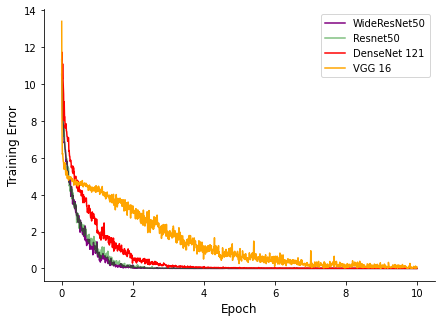

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

my_dict_vgg = dict(x = np.arange(0, 10, 10 / 1140), y = tr_vgg, z = va_vgg)

v_vgg = pd.DataFrame(my_dict_vgg)

my_dict_resnet = dict(x = np.arange(0, 10, 32 / 3.2 / 1140), y = tr_resnet50, z = va_resnet50)
v_resnet = pd.DataFrame(my_dict_resnet)

my_dict_dense = dict(x = np.arange(0, 10, 10 / 1140), y = tr_dense, z = va_dense)
v_dense = pd.DataFrame(my_dict_dense)

my_dict_wideresnet = dict(x = np.arange(0, 10, 10 / 1140), y = tr, z = va)
v_wideresnet = pd.DataFrame(my_dict_wideresnet)

plt.figure(figsize = (7, 5))
te = sns.lineplot(x = 'x', y = 'y', data = v_wideresnet, label = "WideResNet50", color = "purple")
te = sns.lineplot(x = 'x', y = 'y', data = v_resnet, label = "Resnet50", color = "green", alpha = 0.5)
te = sns.lineplot(x = 'x', y = 'y', data = v_dense, label = "DenseNet 121", color = "red")
te = sns.lineplot(x = 'x', y = 'y', data = v_vgg, label = "VGG 16", color = "orange")

plt.xlabel("Epoch", fontsize = 12)
plt.ylabel("Training Error", fontsize = 12)

te.spines['top'].set_visible(False)
te.spines['right'].set_visible(False)

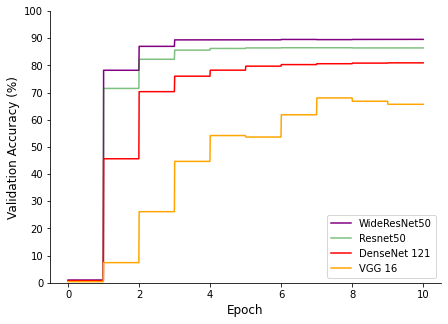

In [59]:
plt.figure(figsize = (7, 5))
vaplt = sns.lineplot(x = 'x', y = 'z', data = v_wideresnet, label = "WideResNet50", color = "purple") 
vaplt = sns.lineplot(x = 'x', y = 'z', data = v_resnet, label = "Resnet50", color = "green", alpha = 0.5)
vaplt = sns.lineplot(x = 'x', y = 'z', data = v_dense, label = "DenseNet 121", color = "red")
vaplt = sns.lineplot(x = 'x', y = 'z', data = v_vgg, label = "VGG 16", color = "orange")

plt.ylim(0, 1)
plt.yticks(np.arange(0, 1 + 0.01, 0.1), np.arange(0, 27 + 73 + 1, 10))

plt.xlabel("Epoch", fontsize = 12)
plt.ylabel("Validation Accuracy (%)", fontsize = 12)

vaplt.spines['top'].set_visible(False)
vaplt.spines['right'].set_visible(False)

We can see the Wide ResNet50 architecture performed the best among all the models we experimented with. It will be our baseline model to improve upon. We also observed some overfitting near the end of training, so our modification will be focus on reducing the overfitting, through mainly different regularization terms. 

# Improving Architecture 

We have chosen the WideResNet50 to be the baseline architecture for us to improve. And here we experiment with various combinations of regularization techniques to reduce overfitting and improve the overall classification performance. The codes will not be displayed because it's basically running different modifications over and over to figure out the best combination. 

# Resulting Improved Architecture 

Now we have chosen the best combination of regularization terms through trails and errors, we can add them to our model by replacing the fully connected layer with our custom Regularization Block, which is: Linear -> BatchNorm -> Dropout(20%) -> Linear -> Results. 

<div>
<img src="our_regulation.png" width="200"/>
</div>

We train our model using the same settings used by the other baseline models: Cross-Entropy loss and Adam Optimizer, with batch size = 64, Learning Rate = 0.0001, and trained for 10 epoch. 

In [17]:
class WideResnetplus(nn.Module):
    def __init__(self):
        super(WideResnetplus, self).__init__()
        self.model = models.wide_resnet50_2(pretrained = True)
        self.model.fc = nn.Sequential(
            nn.Linear(2048, 256),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),
            nn.Linear(256, 88)
        )
        
    def forward(self, x): 
        batch_size, _, _,_ = x.shape
        x = self.model(x)
        return x

In [18]:
wide_resnetplus = WideResnetplus()
optimizer = optim.Adam(wide_resnetplus.parameters(), lr = 0.0001)
tr_improved, va_improved = train_model(wide_resnetplus, optimizer, epochs = 10)

J:\Anaconda\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 0, Training Error: 4.7069878578186035
Validation Accuracy: 1.2524084778420037%

Epoch: 1, Training Error: 0.7200942635536194
Validation Accuracy: 88.0539499036609%

Epoch: 2, Training Error: 0.12381762266159058
Validation Accuracy: 92.10019267822736%

Epoch: 3, Training Error: 0.035336967557668686
Validation Accuracy: 93.32048811817599%

Epoch: 4, Training Error: 0.020139440894126892
Validation Accuracy: 92.96724470134875%

Epoch: 5, Training Error: 0.014753320254385471
Validation Accuracy: 93.60950545921645%

Epoch: 6, Training Error: 0.011359295807778835
Validation Accuracy: 93.64161849710982%

Epoch: 7, Training Error: 0.009337170980870724
Validation Accuracy: 93.64161849710982%

Epoch: 8, Training Error: 0.007934864610433578
Validation Accuracy: 93.7058445728966%

Epoch: 9, Training Error: 0.006869723089039326
Validation Accuracy: 93.64161849710982%



In [87]:
# Testing Accuracy 
num_correct = 0
num_samples = 0
wide_resnetplus.eval()  
with torch.no_grad():
    for x, y in loader_t:
        x = x.to(device = device, dtype = dtype)  
        y = y.to(device = device, dtype = torch.long)
        scores = wide_resnetplus(x)
        _, preds = scores.max(1)
        num_correct += (preds == y).sum()
        num_samples += preds.size(0)
    cs = float(num_correct) / num_samples
print("Testing Accuracy: " + str(cs * 10 * 10) + "%") 

Testing Accuracy: 96.24639076034649%


In [ ]:
del wide_resnetplus
gc.collect()
torch.cuda.empty_cache()

CSmpare it to the vanilla Wide Resnet50 architecture. 

In [ ]:
wide_resnet50 = models.wide_resnet50_2(pretrained = True)
optimizer = optim.Adam(wide_resnet50.parameters(), lr = 0.0001)
tr, va = train_model(wide_resnet50, optimizer, epochs = 10)

In [92]:
# Testing Accuracy 
num_correct = 0
num_samples = 0
wide_resnet50.eval()  
with torch.no_grad():
    for x, y in loader_t:
        x = x.to(device = device, dtype = dtype)  
        y = y.to(device = device, dtype = torch.long)
        scores = wide_resnet50(x)
        _, preds = scores.max(1)
        num_correct += (preds == y).sum()
        num_samples += preds.size(0)
    cs = float(num_correct) / num_samples
print("Testing Accuracy of Vanilla WideResnet50: " + str(cs * 10 * 10) + "%") 

Testing Accuracy of Vanilla WideResnet50: 91.14533205004813%


In [121]:
del wide_resnet50
gc.collect()
torch.cuda.empty_cache()

Our model achieved over 5% improvement in testing accuracy over the vanilla WideResnet50! 

# Model Comparison Visualization 

Now we have implemented our improved structure, we compare the performance between our improved model, and the other baseline models. We will visualize the training error curve and validation accuracy curve to better understand the behavior of the models. Again, all models are trained for 10 epoch, using Cross-Entropy loss and Adam Optimizer, with batch size = 64, and Learning Rate = 0.0001. 


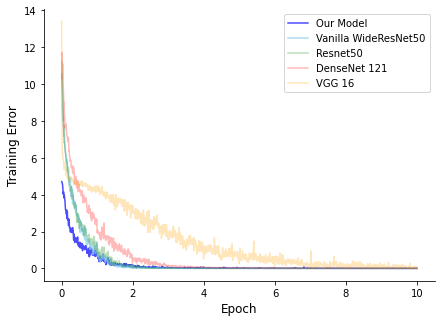

In [60]:
my_dict_vgg = dict(x = np.arange(0, 10, 10 / 1140), y = tr_vgg, z = va_vgg)
v_vgg = pd.DataFrame(my_dict_vgg)

my_dict_resnet = dict(x = np.arange(0, 10, 32 / 3.2 / 1140), y = tr_resnet50, z = va_resnet50)
v_resnet = pd.DataFrame(my_dict_resnet)

my_dict = dict(x = np.arange(0, 10, 10 / 1140), y = tr_improved, z = va_improved)
vii = pd.DataFrame(my_dict)

my_dict_dense = dict(x = np.arange(0, 10, 10 / 1140), y = tr_dense, z = va_dense)
v_dense = pd.DataFrame(my_dict_dense)

my_dict_wideresnet = dict(x = np.arange(0, 10, 10 / 1140), y = tr, z = va)
v_wideresnet = pd.DataFrame(my_dict_wideresnet)

plt.figure(figsize = (7, 5))

te = sns.lineplot(x = 'x', y = 'y', data = vii, label = "Our Model", color = "blue", alpha = 0.7)
te = sns.lineplot(x = 'x', y = 'y', data = v_wideresnet, label = "Vanilla WideResNet50", color = "skyblue", alpha = 0.7)
te = sns.lineplot(x = 'x', y = 'y', data = v_resnet, label = "Resnet50", color = "green", alpha = 0.27)
te = sns.lineplot(x = 'x', y = 'y', data = v_dense, label = "DenseNet 121", color = "red", alpha = 0.27)
te = sns.lineplot(x = 'x', y = 'y', data = v_vgg, label = "VGG 16", color = "orange", alpha = 0.27)

plt.xlabel("Epoch", fontsize = 12)
plt.ylabel("Training Error", fontsize = 12)

te.spines['top'].set_visible(False)
te.spines['right'].set_visible(False)

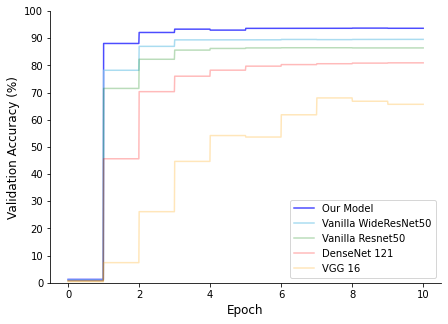

In [38]:
plt.figure(figsize = (7, 5))

vaplt = sns.lineplot(x = 'x', y = 'z', data = vii, label = "Our Model", color = "blue", alpha = 0.7) 
vaplt = sns.lineplot(x = 'x', y = 'z', data = v_wideresnet, label = "Vanilla WideResNet50", color = "skyblue", alpha = 0.7) 
vaplt = sns.lineplot(x = 'x', y = 'z', data = v_resnet, label = "Resnet50", color = "green", alpha = 0.27)
vaplt = sns.lineplot(x = 'x', y = 'z', data = v_dense, label = "DenseNet 121", color = "red", alpha = 0.27)
vaplt = sns.lineplot(x = 'x', y = 'z', data = v_vgg, label = "VGG 16", color = "orange", alpha = 0.27)

plt.ylim(0, 1)
plt.yticks(np.arange(0, 1 + 0.01, 0.1), np.arange(0, 27 + 73 + 1, 10))

plt.xlabel("Epoch", fontsize = 12)
plt.ylabel("Validation Accuracy (%)", fontsize = 12)

vaplt.spines['top'].set_visible(False)
vaplt.spines['right'].set_visible(False)

And clearly, we can see our improved model converged faster than all other baseline models during training, and also constantly outperforms all other models in validation accuracy. 

Image 

# Analysis of Results 

We will try to understant the decision process of our model through Class Activitaion Map. 

In [222]:
import os 
def get_cls_pred(logit):
    """
    :param logit: input logit 
    :type logit: pytorch tensor 
    
    :returns: top classification 
    :type returns: integer 
    
    """
    assert True 

    classes = {}
    
    for i in range(len(os.listdir("processed/processed"))): 
        classes[i] = os.listdir("processed/processed")[i]
    
    cs = nn.functional.softmax(logit)
    top1_prob, top1_idx = torch.sort(cs)
    top1_prob, top1_idx = top1_prob[0][-1], top1_idx[0][-1]
    
    print(top1_prob.item(), classes[top1_idx.item()])

    return top1_prob, top1_idx.item()


def returnCAM(feature_conv, weight_fc, idx):
    """
    :param feature_conv: (1, 2048, 7, 7) layer4 feature
    :type feature_conv: numpy array 
    
    :param weight_fs: (2048, 256) softmax weights
    :type weight_fs: numpy array 
    
    :param idx: predicted class index
    :type idx: integer 
    
    :returns: CAM
    :type returns: numpy array 
    
    """
    size_upsample = (224, 224)
    bz, nc, h, w = feature_conv.shape
    
    cam_img = np.zeros((7, 7))
    for i in range(255): 
        cam_img = cam_img + weight_fc[idx][i] * feature_conv[0][i]
    
    cam_img = (cam_img - np.min(cam_img)) / np.max(cam_img) * 255
    output_cam = cv2.resize(cam_img, size_upsample)

    return output_cam.astype(np.uint8)

J:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0.9976904392242432 squirrel


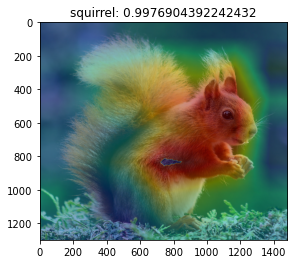

0.9915969967842102 antelope


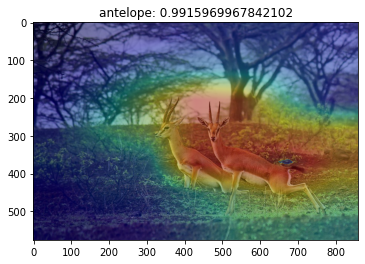

0.9959864020347595 antelope


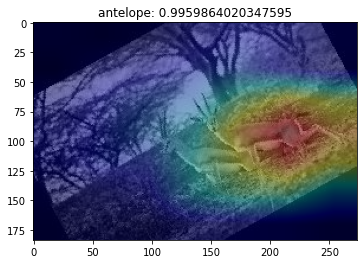

0.7309257984161377 antelope


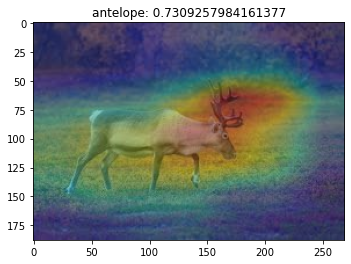

0.47569313645362854 kangaroo


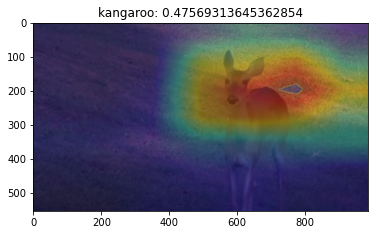

In [259]:
import io
from PIL import Image
from torchvision import transforms
import cv2
import matplotlib.pyplot as plt

classes = {}
    
for i in range(len(os.listdir("processed/processed"))): 
    classes[i] = os.listdir("processed/processed")[i]
    
activation = {}

def getActivation(name): 
    """ 
    Extract features 
    
    :param name: name of layer to extract 
    :type name: str
    
    :returns: hk 
    :type returns: layer 
    
    """  
    assert True 
    
    def hook(model, input, output):
        activation[name] = output.detach()
        
    return hook

preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

count = 0
layer4_feat = []
for image_file in ["squirrel.jpg", "antelope_2.jpg", "antelope.jpg", "reindeer.jpg", "deeer.jpg"]:
    img = Image.open(image_file)
    img_tensor = preprocess(img)
    wide_resnetplus.eval()
    logits = wide_resnetplus(img_tensor.cuda().unsqueeze(0))
    hk = wide_resnetplus.model.layer4.register_forward_hook(getActivation('layer4'))
    layer4_feat.append(activation["layer4"].detach().cpu().numpy())
    hk.remove()

    pr, cls_idx = get_cls_pred(logits.cpu())
    weight_fc = wide_resnetplus.model.fc[0].weight.detach().cpu().numpy()
    
    CAMs = returnCAM(layer4_feat[count], weight_fc, cls_idx)
    
    img = cv2.imread(image_file)
    height, width, _ = img.shape
    heatmap = cv2.applyColorMap(cv2.resize(CAMs,(width, height)), cv2.COLORMAP_JET)
    result = heatmap * 0.3 + img * 0.5
    plt.imshow(result[:,:,::-1]/255)
    plt.title(classes[cls_idx] + ": " + str(pr.item()))
    plt.show()
    count = count + 1

In [191]:
gc.collect()
torch.cuda.empty_cache()

# Thank you! 